In [8]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%autoreload 2

# Чтение датасета и разбиение на train/test

In [10]:
import pandas as pd
import numpy as np


# X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=1.2)

# y = np.where(y > 0, 1, -1)
dataset = pd.read_csv("processed_dataset.csv", index_col=0)
dataset = dataset.sample(frac=1, replace=False)

X = dataset.drop(columns="RainTomorrow").to_numpy()
X = np.hstack([X, np.zeros((len(X), 1))])  # bias
X[:, -1] = 0.1
y = dataset["RainTomorrow"].to_numpy()

X_train = X[:20000]
y_train = y[:20000]
X_test = X[-20000:]
y_test = y[-20000:]

# X_train = X[:800]
# y_train = y[:800]
# X_test = X[800:]
# y_test = y[800:]

# Загрузка и обучение моделей

In [26]:
from main import LogReg

model = LogReg(method="nr")

loss = model.fit(X_train, y_train, learning_rate=0.05, n_iter=30)

Iteration 1: Q = 9143.341288075811
Iteration 2: Q = 8528.58476646094
Iteration 3: Q = 8058.807682413157
Iteration 4: Q = 7722.330800320151
Iteration 5: Q = 7514.452788398676
Iteration 6: Q = 7422.644897915068
Iteration 7: Q = 7406.294751345837
Iteration 8: Q = 7410.490276891105
Iteration 9: Q = 7414.239650882299
Iteration 10: Q = 7416.537378322995
Iteration 11: Q = 7417.808420899999
Iteration 12: Q = 7418.5049873880125
Iteration 13: Q = 7418.888997761438
Iteration 14: Q = 7419.103647000044
Iteration 15: Q = 7419.2252601452
Iteration 16: Q = 7419.294971866288
Iteration 17: Q = 7419.335293435414
Iteration 18: Q = 7419.358758111391
Iteration 19: Q = 7419.372454237079
Iteration 20: Q = 7419.380445818131
Iteration 21: Q = 7419.385089418722
Iteration 22: Q = 7419.387763814204
Iteration 23: Q = 7419.389281010375
Iteration 24: Q = 7419.390121194922
Iteration 25: Q = 7419.390568763726
Iteration 26: Q = 7419.390791929475
Iteration 27: Q = 7419.390889727255
Iteration 28: Q = 7419.390919961821
Ite

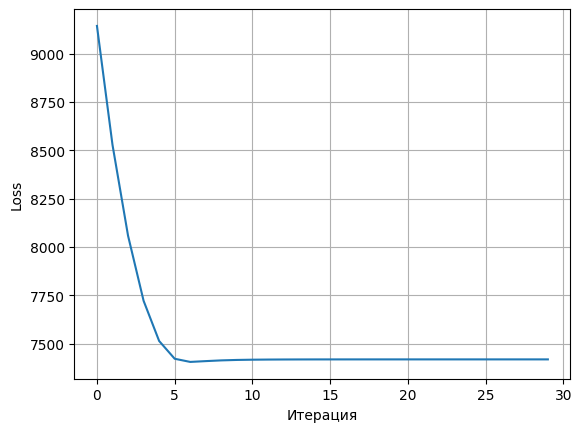

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Расчет метрик

In [15]:
from main import MetricsEstimator

estimator = MetricsEstimator()

In [23]:
estimator.get_metrics(y_true=y_test, y_pred=model.predict(X_test))

In [ ]:
# NR
print(estimator)

accuracy = 0.84055
precision = 0.7051065268853568
recall = 0.4736483416628805
f1_score = 0.5666530778638402


In [ ]:
# IRLS
print(estimator)

accuracy = 0.8421
precision = 0.7152249134948097
recall = 0.4695592912312585
f1_score = 0.5669226549643445


# Обучение эталонной версии

In [12]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
y_pred = classifier.predict(X_test)

In [16]:
estimator.get_metrics(y_true=y_test, y_pred=y_pred)
print(estimator)

accuracy = 0.8375
precision = 0.7243523316062176
recall = 0.4609804352604968
f1_score = 0.5634067705534659
